# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
# read data
df = pd.read_csv('Fuel.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# select some features to explore more
df = df[['ENGINESIZE','CO2EMISSIONS']]

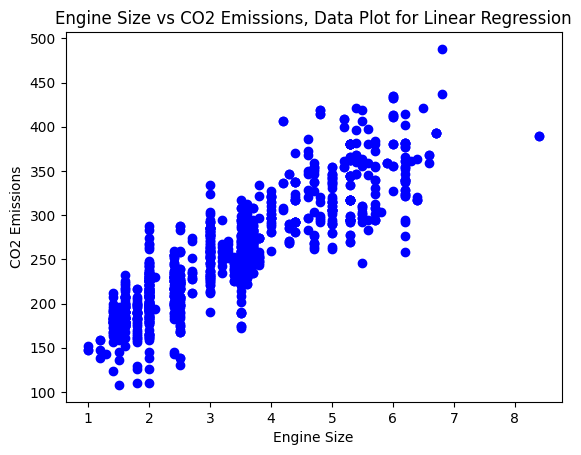

In [8]:
# plot each of these features
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions, Data Plot for Linear Regression')
plt.show()

In [9]:
# split data set into train and test sets
train = df[:(int((len(df)*0.8)))] # 80% of data for training
test = df[(int((len(df)*0.8))):] # 20% of data for testing

print(train)
print(test)

     ENGINESIZE  CO2EMISSIONS
0           2.0           196
1           2.4           221
2           1.5           136
3           3.5           255
4           3.5           244
..          ...           ...
848         3.5           251
849         3.5           271
850         2.0           214
851         3.5           244
852         3.5           253

[853 rows x 2 columns]
      ENGINESIZE  CO2EMISSIONS
853          2.5           202
854          3.5           255
855          2.5           191
856          2.5           198
857          1.8           161
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[214 rows x 2 columns]


In [10]:
# train the model
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# the coefficients
print('Coefficients: ', regr.coef_) # slope of the line and the letter 'm' in y=mx+b
print('Intercept: ', regr.intercept_) # intercept of the line and the letter 'b' in y=mx+b



Coefficients:  [[38.79512384]]
Intercept:  [127.16989951]


Text(0.5, 1.0, 'Engine Size vs CO2 Emissions, Data Plot for Linear Regression')

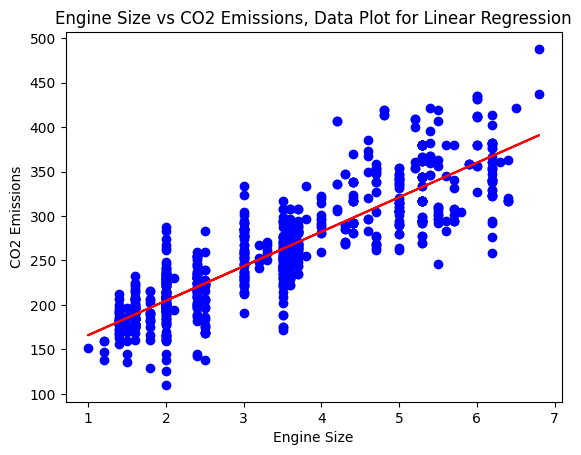

In [11]:
# plot the fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions, Data Plot for Linear Regression')

In [12]:
# predicting values
# function for predicting CO2 emissions
def get_regression_predictions(input_features, intercept, slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [13]:
# predict the CO2 emissions for a car with 3.5L engine
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print('Estimated Emission for', my_engine_size, 'L engine:', estimatd_emission)

Estimated Emission for 3.5 L engine: 262.9528329350173


In [14]:
# evaluate the model
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)


In [15]:
# mean absolute error means the average of the absolute errors between the predicted values and the actual values
print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))

# mean square error is the average of the squares of the errors between the predicted values and the actual values
print('Mean Square Error: %.2f' % np.mean((test_y_ - test_y)**2))

# r2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s) closer to 1 is better
print('R2 Score: %.2f' % r2_score(test_y_, test_y))


Mean Absolute Error: 20.60
Mean Square Error: 746.45
R2 Score: 0.71
